# Red Ventures - Take Home Assignment - EDA

In [1]:
# Required modules

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
# Load the data

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Glimpse on the train data

train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10244 entries, 0 to 10243
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  10244 non-null  int64  
 1   limit_bal    10244 non-null  int64  
 2   sex          10244 non-null  float64
 3   education    10244 non-null  float64
 4   marriage     10244 non-null  float64
 5   age          10244 non-null  float64
 6   pay_1        10244 non-null  float64
 7   pay_2        10244 non-null  float64
 8   pay_3        10244 non-null  float64
 9   pay_4        10244 non-null  float64
 10  pay_5        10166 non-null  float64
 11  pay_6        9738 non-null   float64
 12  bill_amt1    10243 non-null  float64
 13  bill_amt2    10243 non-null  float64
 14  bill_amt3    10243 non-null  float64
 15  bill_amt4    10243 non-null  float64
 16  bill_amt5    10165 non-null  float64
 17  bill_amt6    9737 non-null   float64
 18  pay_amt1     10243 non-null  float64
 19  pay_

,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,10244.000000,10244.000000,10244.000000,10244.000000,10244.000000,10244.000000,10244.000000,10244.000000,10244.000000,10244.000000,...,10243.000000,10243.000000,10165.000000,9737.000000,10243.000000,10243.00000,10243.000000,10243.000000,10165.000000,9737.000000
mean,5122.500000,8348.672394,1.602889,1.852304,1.553007,35.467005,-0.016790,-0.120754,-0.168098,-0.216615,...,2375.347066,2190.056038,2038.955042,1988.354729,269.841550,290.59875,268.255882,242.827101,250.761731,260.786998
std,2957.332413,6481.049147,0.489323,0.789684,0.524162,9.219252,1.127051,1.202832,1.190468,1.157614,...,3450.865830,3261.370929,3086.237097,3078.649691,722.120208,876.88989,936.141430,800.072769,877.470640,893.316533
min,1.000000,500.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-2306.000000,-8500.000000,-4066.000000,-4731.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2561.750000,2500.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,140.000000,118.000000,91.000000,64.000000,47.000000,50.00000,19.000000,15.000000,14.000000,8.000000
50%,5122.500000,7000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,1006.000000,965.000000,917.000000,881.000000,103.000000,101.00000,92.000000,75.000000,75.000000,75.000000
75%,7683.250000,12000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,3044.500000,2773.000000,2526.000000,2470.000000,250.000000,250.00000,230.000000,200.000000,205.000000,201.000000
max,10244.000000,50000.000000,2.000000,6.000000,3.000000,74.000000,8.000000,7.000000,8.000000,8.000000,...,29870.000000,44579.000000,46358.000000,48083.000000,16150.000000,20777.00000,44802.000000,24850.000000,20899.000000,26433.000000


In [4]:
# Glimpse on the test data

test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  5999 non-null   int64  
 1   limit_bal    5999 non-null   int64  
 2   sex          5999 non-null   float64
 3   education    5999 non-null   float64
 4   marriage     5999 non-null   float64
 5   age          5999 non-null   float64
 6   pay_1        5999 non-null   float64
 7   pay_2        5999 non-null   float64
 8   pay_3        5999 non-null   float64
 9   pay_4        5999 non-null   float64
 10  pay_5        5955 non-null   float64
 11  pay_6        5709 non-null   float64
 12  bill_amt1    5999 non-null   int64  
 13  bill_amt2    5999 non-null   int64  
 14  bill_amt3    5999 non-null   int64  
 15  bill_amt4    5999 non-null   int64  
 16  bill_amt5    5955 non-null   float64
 17  bill_amt6    5709 non-null   float64
 18  pay_amt1     5999 non-null   int64  
 19  pay_am

,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,...,5999.000000,5999.000000,5955.000000,5709.000000,5999.000000,5999.000000,5999.000000,5999.000000,5955.000000,5709.000000
mean,27001.000000,8465.891649,1.602434,1.838306,1.552759,35.433739,-0.020003,-0.140357,-0.166194,-0.240040,...,2312.106184,2110.538923,1971.674559,1904.727973,290.436906,286.199700,252.901984,232.027005,242.401175,284.189525
std,1731.906464,6534.081379,0.489436,0.782984,0.519229,9.201999,1.124880,1.189023,1.197231,1.152027,...,3335.419806,3103.495178,2950.030089,2865.255691,748.761295,852.091851,799.425171,787.833885,698.798315,1031.312882
min,24002.000000,500.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-7863.000000,-1374.000000,-1807.000000,-16980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25501.500000,2500.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,139.000000,116.000000,76.000000,63.000000,50.000000,41.500000,20.000000,11.000000,10.500000,3.000000
50%,27001.000000,7000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,991.000000,949.000000,894.000000,835.000000,106.000000,100.000000,90.000000,75.000000,77.000000,75.000000
75%,28500.500000,12000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,2971.000000,2601.000000,2489.000000,2455.000000,255.500000,250.000000,220.000000,200.000000,209.000000,200.000000
max,30000.000000,40000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,...,28897.000000,30841.000000,27394.000000,24955.000000,15240.000000,16273.000000,20879.000000,26444.000000,16549.000000,26357.000000


In [5]:
# Missing Values in train

train.isna().sum()

customer_id      0
limit_bal        0
sex              0
education        0
marriage         0
age              0
pay_1            0
pay_2            0
pay_3            0
pay_4            0
pay_5           78
pay_6          506
bill_amt1        1
bill_amt2        1
bill_amt3        1
bill_amt4        1
bill_amt5       79
bill_amt6      507
pay_amt1         1
pay_amt2         1
pay_amt3         1
pay_amt4         1
pay_amt5        79
pay_amt6       507
default_oct      1
dtype: int64

In [6]:
# Missing values in test data

test.isna().sum()

customer_id      0
limit_bal        0
sex              0
education        0
marriage         0
age              0
pay_1            0
pay_2            0
pay_3            0
pay_4            0
pay_5           44
pay_6          290
bill_amt1        0
bill_amt2        0
bill_amt3        0
bill_amt4        0
bill_amt5       44
bill_amt6      290
pay_amt1         0
pay_amt2         0
pay_amt3         0
pay_amt4         0
pay_amt5        44
pay_amt6       290
dtype: int64

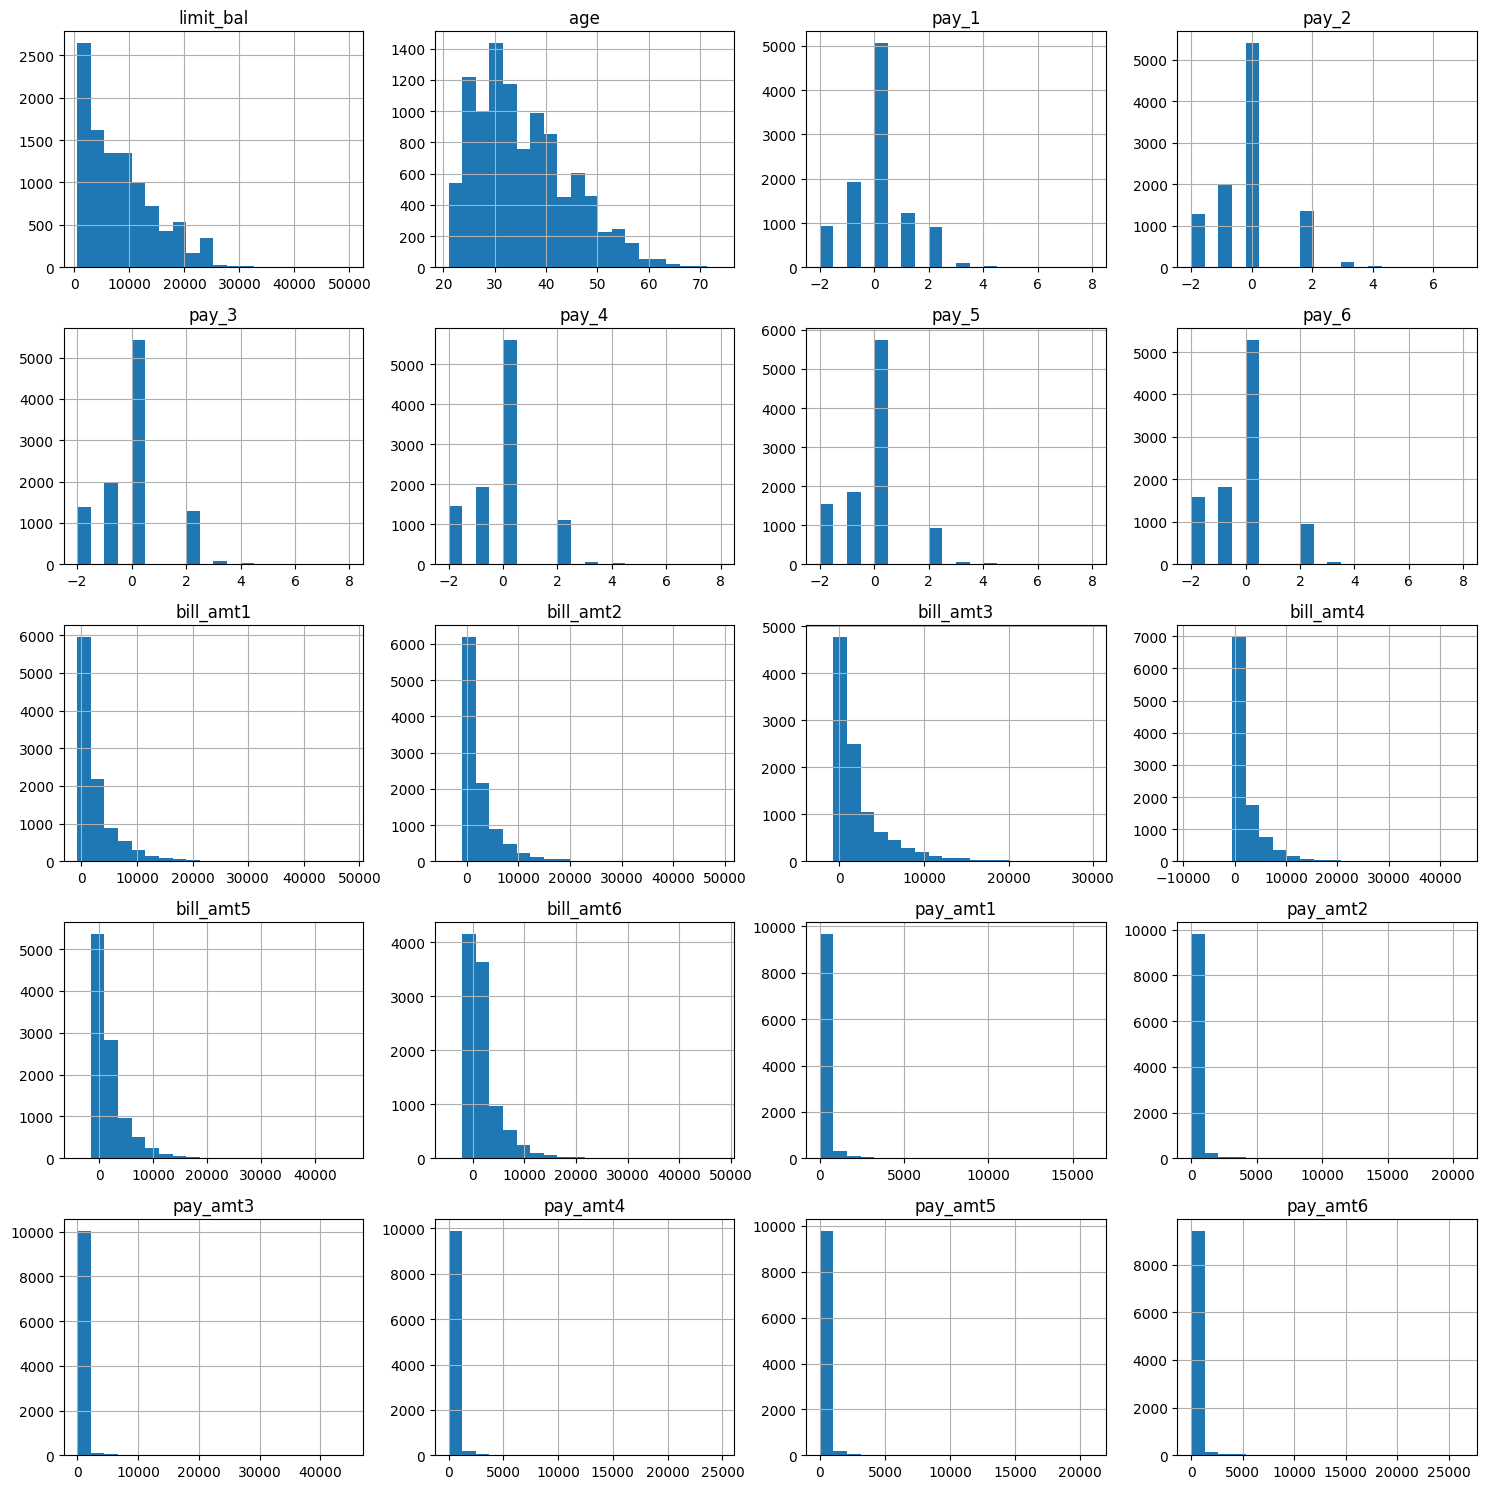

In [7]:
# Visualize the distribution of numerical variables(train)

numerical_cols = ['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
                  'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
                  'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
train[numerical_cols].hist(bins=20, figsize=(15, 15))
plt.tight_layout()
plt.show()

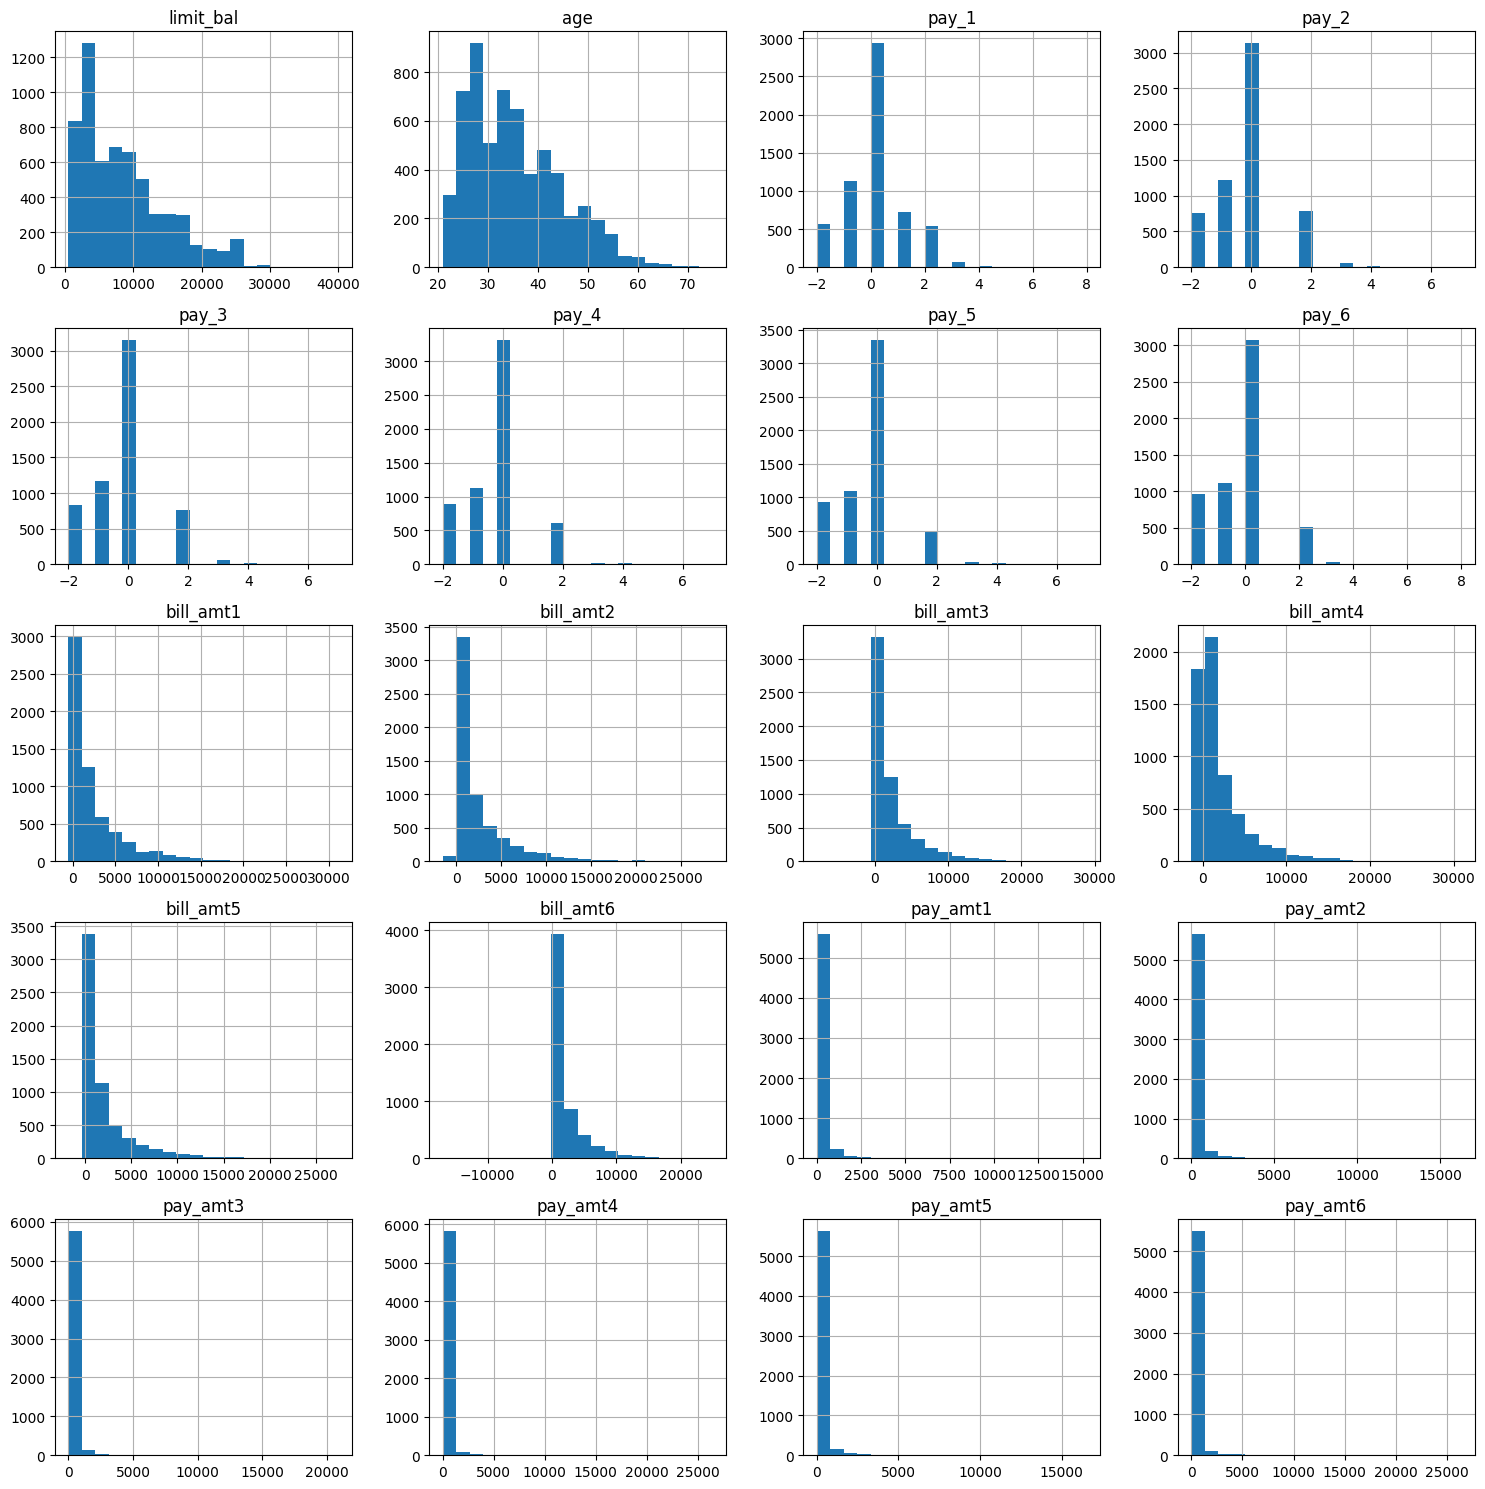

In [8]:
# Visualize the distribution of numerical variables(test)

numerical_cols = ['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
                  'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
                  'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
test[numerical_cols].hist(bins=20, figsize=(15, 15))
plt.tight_layout()
plt.show()

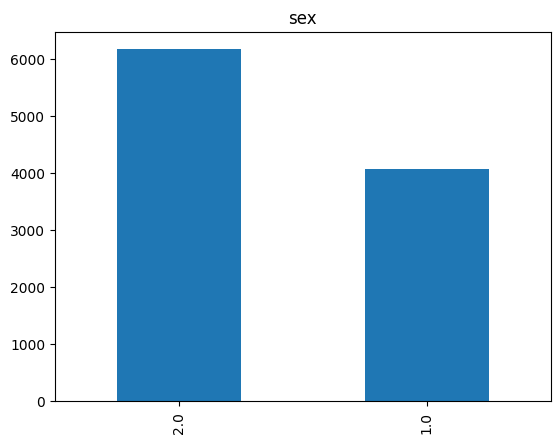

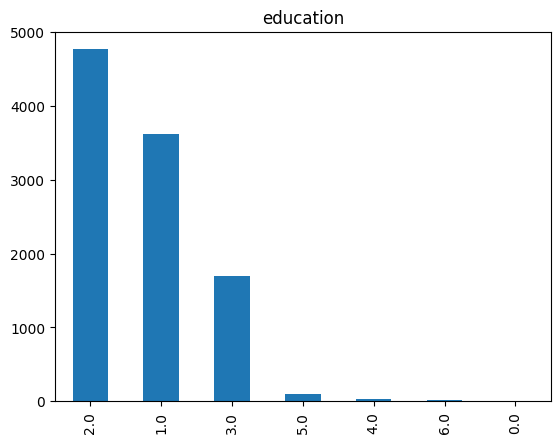

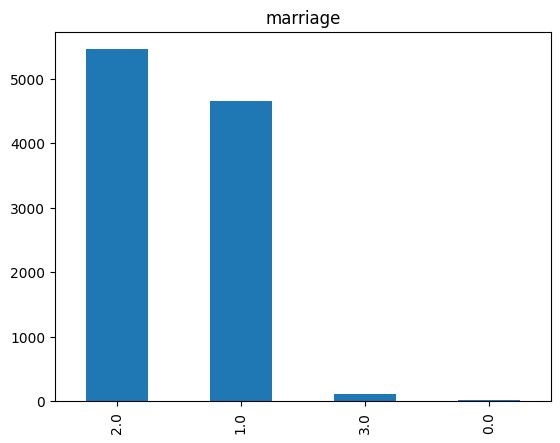

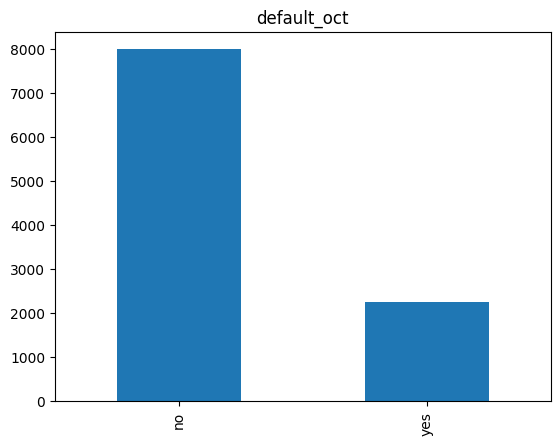

In [9]:
# Visualize the distribution of categorical variables (sex, education, marriage, default_oct) for training set

categorical_cols = ['sex', 'education', 'marriage', 'default_oct']
for col in categorical_cols:
    train[col].value_counts().plot(kind='bar', title=col)
    plt.show()

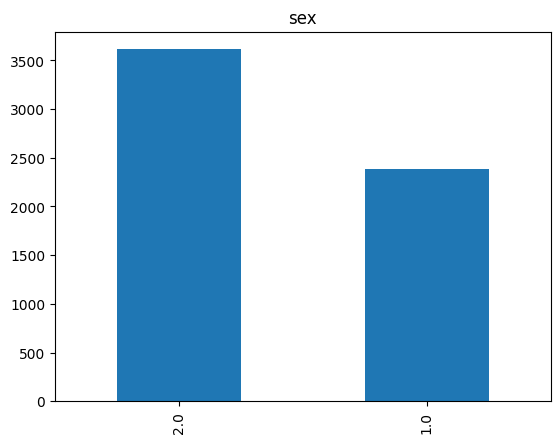

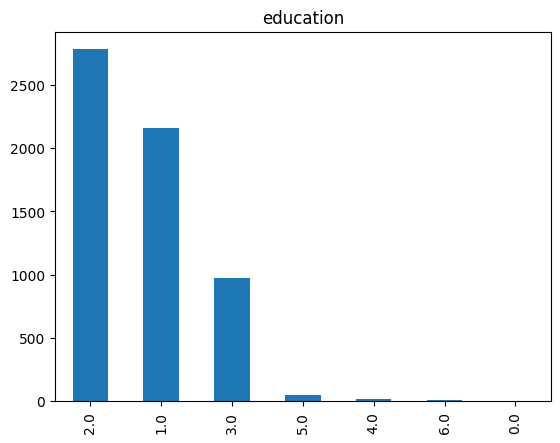

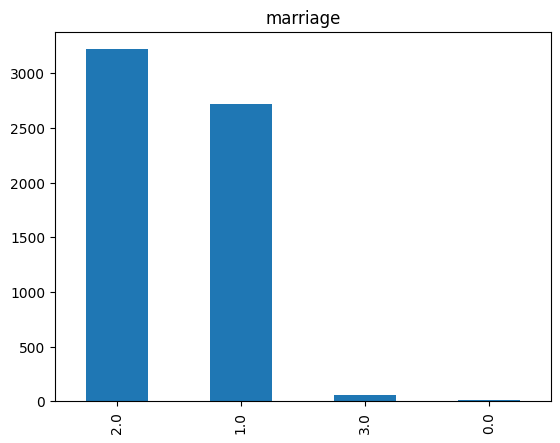

In [10]:
# Visualize the distribution of categorical variables (sex, education, marriage, default_oct) for testing set

categorical_cols = ['sex', 'education', 'marriage']
for col in categorical_cols:
    test[col].value_counts().plot(kind='bar', title=col)
    plt.show()

<ipython-input-13-2083f92181a6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


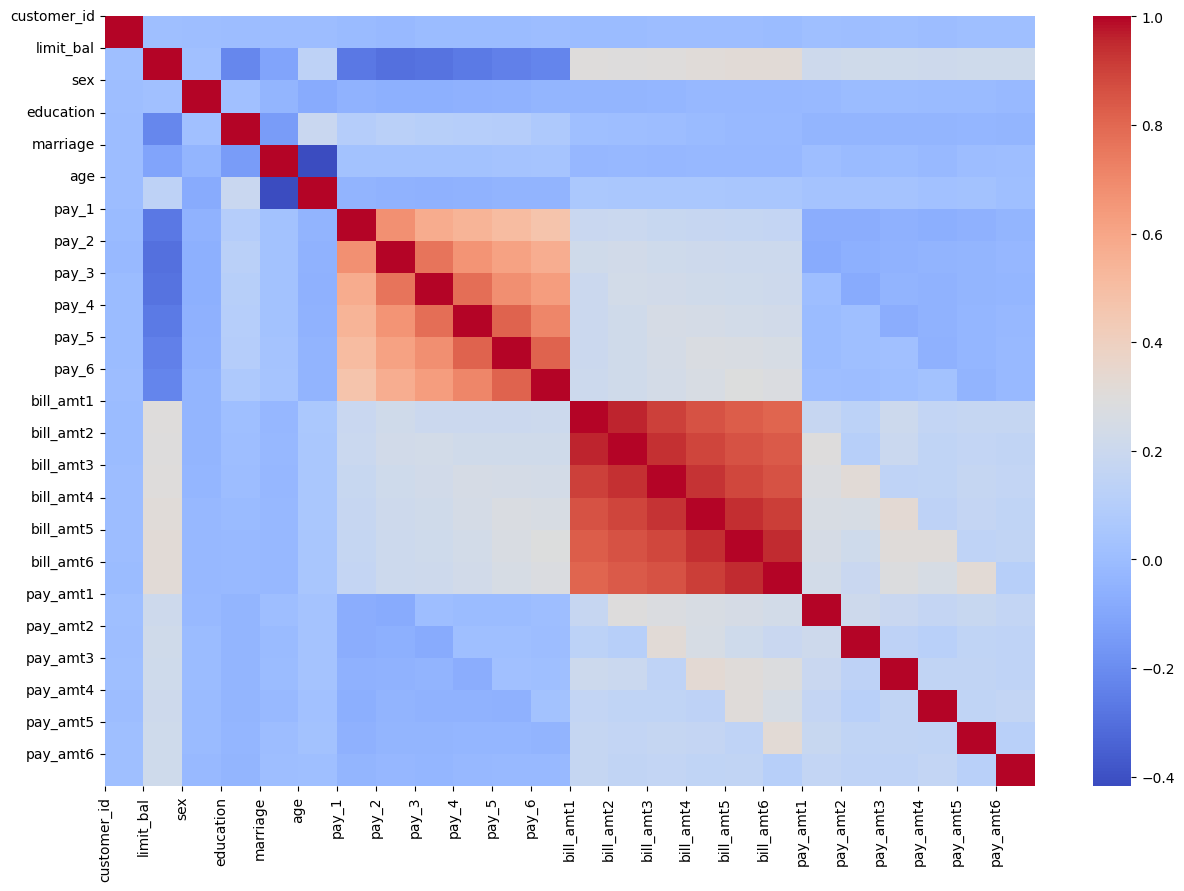

In [13]:
# Heatmap of train dataset

correlation_matrix = train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

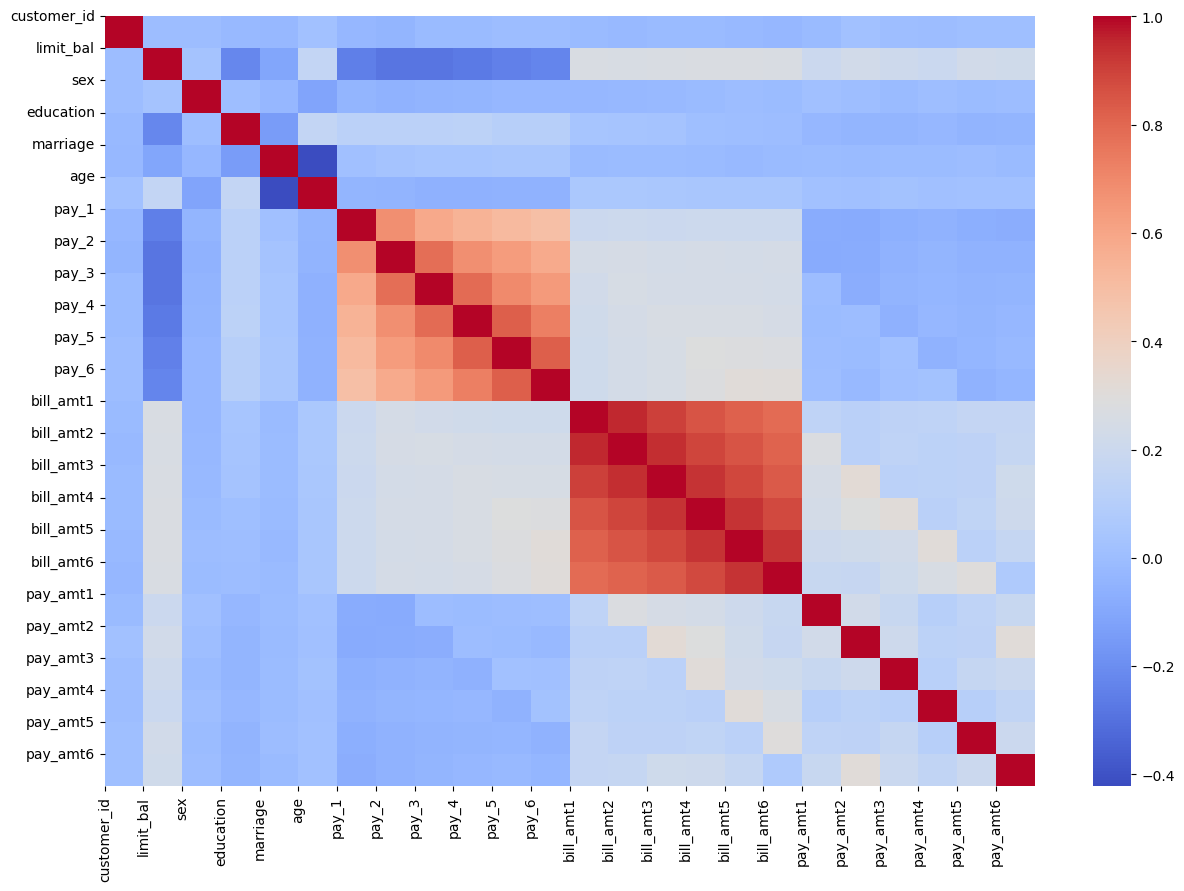

In [14]:
# Heatmap of test dataset

correlation_matrix = test.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

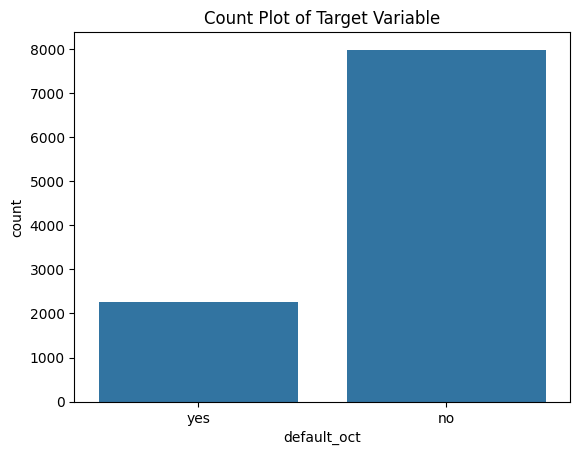

In [15]:
# Count plot of target variable

sns.countplot(data=train, x='default_oct')
plt.title('Count Plot of Target Variable')
plt.show()

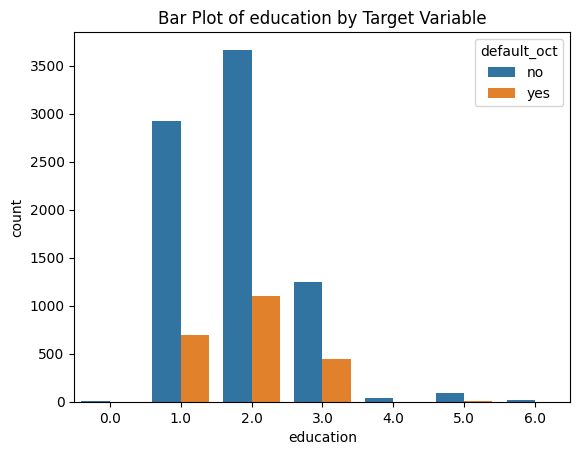

In [16]:
# Categorical variable to plot against target variable
categorical_col = 'education'

# Bar plot
sns.countplot(data=train, x=categorical_col, hue='default_oct')
plt.title(f'Bar Plot of {categorical_col} by Target Variable')
plt.show()

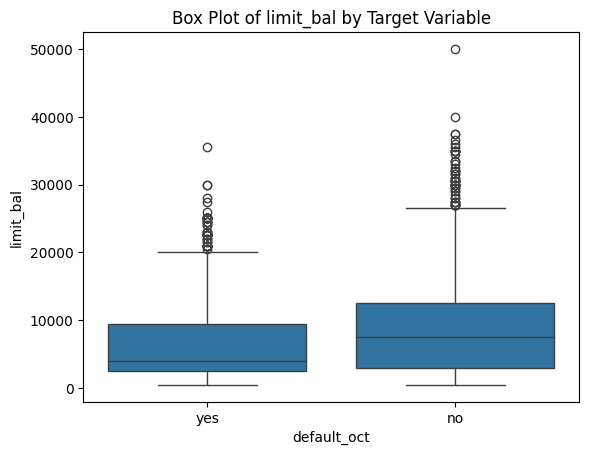

In [17]:
# Numerical variable to plot against target variable
numerical_col = 'limit_bal'

# Box plot
sns.boxplot(data=train, x='default_oct', y=numerical_col)
plt.title(f'Box Plot of {numerical_col} by Target Variable')
plt.show()

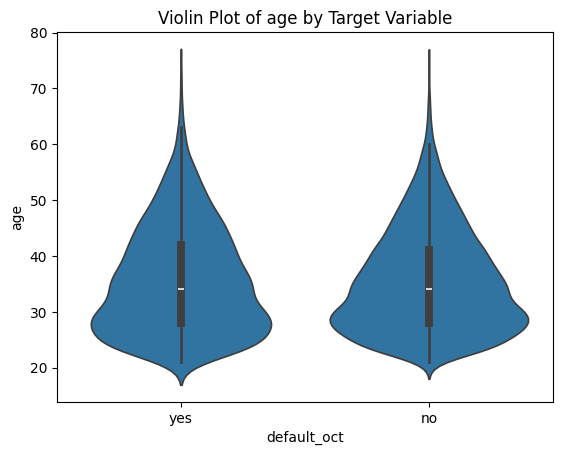

In [18]:
# Numerical variable to plot against target variable
numerical_col = 'age'

# Violin plot
sns.violinplot(data=train, x='default_oct', y=numerical_col)
plt.title(f'Violin Plot of {numerical_col} by Target Variable')
plt.show()

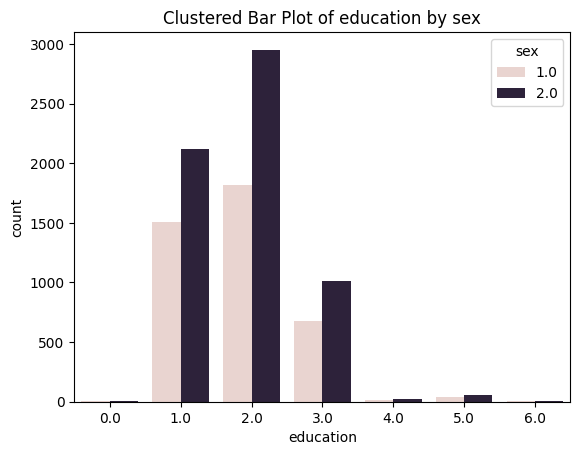

In [20]:
# Two categorical variables to plot
cat_var1 = 'education'
cat_var2 = 'sex'

# Clustered bar plot
sns.countplot(data=train, x=cat_var1, hue=cat_var2, dodge=True)
plt.title(f'Clustered Bar Plot of {cat_var1} by {cat_var2}')
plt.show()

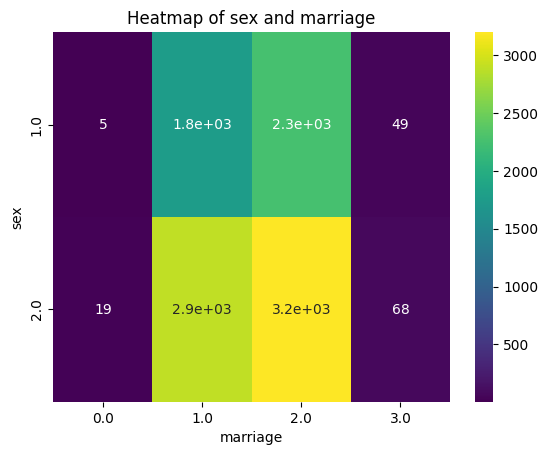

In [21]:
# Two categorical variables to plot
cat_var1 = 'sex'
cat_var2 = 'marriage'

# Create a cross-tabulation
cross_tab = pd.crosstab(train[cat_var1], train[cat_var2])

# Heatmap
sns.heatmap(cross_tab, annot=True, cmap='viridis')
plt.title(f'Heatmap of {cat_var1} and {cat_var2}')
plt.show()